In [1]:
import pandas as pd
import sys
import numpy as np
sys.path.append('data_func')
from data_helper_functions import create_study_periods,create_tensors,apply_wavelet_transform_to_df,apply_wavelets_to_df

In [2]:
data=pd.read_csv('data/corrected_crsp_ff_adjusted.csv')
ibm=data[data['TICKER']=='IBM']

/Users/jacobbarcelona/.pyenv/versions/3.9.16/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3526: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
ibm

,Unnamed: 0,date,TICKER,RET,MktCap
129,211965,1990-02-01,IBM,-0.008872,5.658229e+07
769,211966,1990-02-02,IBM,0.006394,5.694407e+07
1112,211967,1990-02-05,IBM,0.025006,5.766763e+07
2019,211968,1990-02-06,IBM,0.013802,5.846355e+07
2493,211969,1990-02-07,IBM,0.021040,5.969360e+07
...,...,...,...,...,...
3273563,218491,2015-12-24,IBM,-0.002093,1.341177e+08
3273988,218492,2015-12-28,IBM,-0.004629,1.334968e+08
3274107,218493,2015-12-29,IBM,0.015769,1.356020e+08
3274804,218494,2015-12-30,IBM,-0.003148,1.351751e+08


In [13]:
signal = ibm['RET'].values
print(signal)
print(type(signal))
print(signal.dtype)

['-0.008872' '0.006394' '0.025006' ... 0.015769 -0.003148 -0.012344]
<class 'numpy.ndarray'>
object


In [16]:
signal = np.array(signal, dtype=float)

In [17]:
ibm['RET']=signal

/var/folders/bm/bm_nkxfx3w1303dr6gyz9cg00000gn/T/ipykernel_38041/2554705800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibm['RET']=signal


In [25]:
ibm_wavelet=apply_wavelet_transform_to_df(ibm,'RET',window_size=3)

<Axes: >

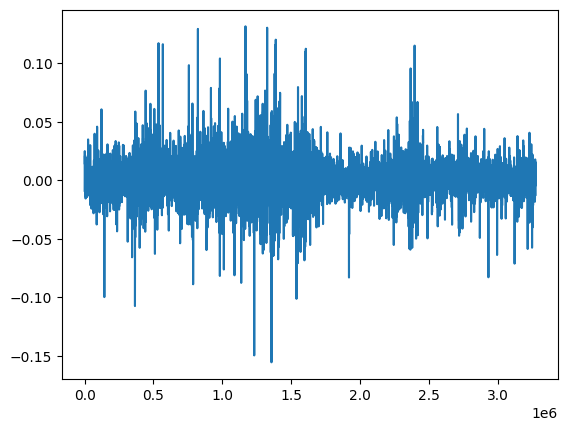

In [26]:
ibm['RET'].plot()

<Axes: >

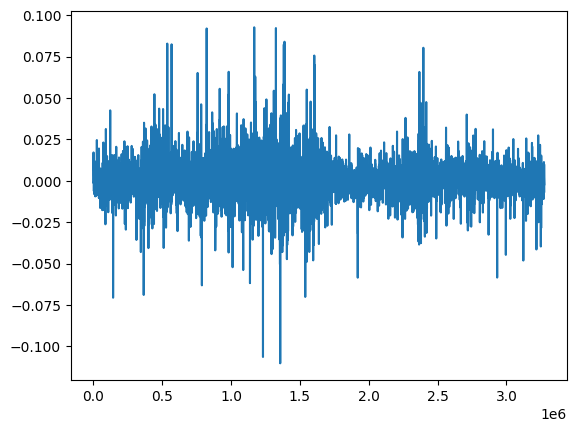

In [27]:
ibm_wavelet['RET'].plot()

In [28]:
ibm

,Unnamed: 0,date,TICKER,RET,MktCap
129,211965,1990-02-01,IBM,-0.008872,5.658229e+07
769,211966,1990-02-02,IBM,0.006394,5.694407e+07
1112,211967,1990-02-05,IBM,0.025006,5.766763e+07
2019,211968,1990-02-06,IBM,0.013802,5.846355e+07
2493,211969,1990-02-07,IBM,0.021040,5.969360e+07
...,...,...,...,...,...
3273563,218491,2015-12-24,IBM,-0.002093,1.341177e+08
3273988,218492,2015-12-28,IBM,-0.004629,1.334968e+08
3274107,218493,2015-12-29,IBM,0.015769,1.356020e+08
3274804,218494,2015-12-30,IBM,-0.003148,1.351751e+08


In [29]:
ibm_wavelet

,Unnamed: 0,date,TICKER,RET,MktCap
129,211965,1990-02-01,IBM,-0.000993,5.658229e+07
769,211966,1990-02-02,IBM,0.000000,5.694407e+07
1112,211967,1990-02-05,IBM,0.017127,5.766763e+07
2019,211968,1990-02-06,IBM,0.006463,5.846355e+07
2493,211969,1990-02-07,IBM,0.013701,5.969360e+07
...,...,...,...,...,...
3273563,218491,2015-12-24,IBM,-0.000149,1.341177e+08
3273988,218492,2015-12-28,IBM,-0.002685,1.334968e+08
3274107,218493,2015-12-29,IBM,0.009917,1.356020e+08
3274804,218494,2015-12-30,IBM,-0.000000,1.351751e+08


In [10]:
#convert return to float
signal=ibm['RET']
signal = np.array(signal, dtype=float)
ibm['RET']=signal

/var/folders/bm/bm_nkxfx3w1303dr6gyz9cg00000gn/T/ipykernel_42844/775929702.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibm['RET']=signal


In [11]:
ibm_wavelets=apply_wavelets_to_df(ibm,'RET')

In [12]:
ibm_wavelets

,Unnamed: 0,date,TICKER,RET,MktCap,wavelet_0,wavelet_1,wavelet_2,wavelet_3,wavelet_4,wavelet_5,wavelet_6,wavelet_7,wavelet_8,wavelet_9,wavelet_10,wavelet_11
129,211965,1990-02-01,IBM,-0.008872,5.658229e+07,0.000108,0.000275,0.000212,-0.000183,0.000855,-0.000768,0.000928,0.000443,0.000667,0.000614,-0.002397,0.000108
769,211966,1990-02-02,IBM,0.006394,5.694407e+07,0.000108,0.000275,0.000213,-0.000183,0.000861,-0.000770,0.000961,0.000527,0.000962,0.001682,0.000374,0.000108
1112,211967,1990-02-05,IBM,0.025006,5.766763e+07,0.000125,0.000247,0.000187,-0.000132,0.000693,-0.000377,0.000563,0.000719,0.001224,0.002694,0.009065,0.000125
2019,211968,1990-02-06,IBM,0.013802,5.846355e+07,0.000138,0.000226,0.000168,-0.000095,0.000571,-0.000090,0.000281,0.000883,0.001494,0.003721,0.016171,0.000138
2493,211969,1990-02-07,IBM,0.021040,5.969360e+07,0.000146,0.000213,0.000156,-0.000072,0.000496,0.000092,0.000114,0.001017,0.001774,0.004763,0.001773,0.000146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3273563,218491,2015-12-24,IBM,-0.002093,1.341177e+08,-0.002334,-0.001292,-0.002284,-0.000634,0.003566,0.001015,0.001634,-0.000573,0.001972,0.002197,-0.000922,-0.002334
3273988,218492,2015-12-28,IBM,-0.004629,1.334968e+08,-0.002338,-0.001295,-0.002288,-0.000663,0.003587,0.001027,0.001685,-0.000743,0.002386,-0.000229,-0.003532,-0.002338
3274107,218493,2015-12-29,IBM,0.015769,1.356020e+08,-0.002341,-0.001297,-0.002293,-0.000692,0.003608,0.001039,0.001737,-0.000891,0.002866,-0.001382,0.001276,-0.002341
3274804,218494,2015-12-30,IBM,-0.003148,1.351751e+08,-0.002345,-0.001299,-0.002297,-0.000721,0.003630,0.001050,0.001790,-0.001046,0.003329,-0.002876,0.004097,-0.002345


<Axes: >

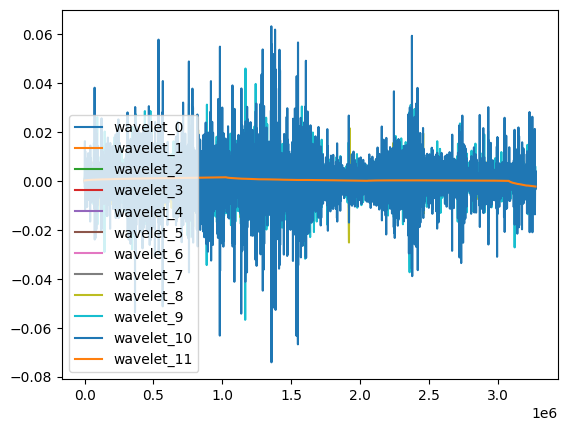

In [13]:
ibm_wavelets=ibm_wavelets.drop(['MktCap','RET','Unnamed: 0'],axis=1)
ibm_wavelets.plot()

In [14]:
ibm_wavelets

,date,TICKER,wavelet_0,wavelet_1,wavelet_2,wavelet_3,wavelet_4,wavelet_5,wavelet_6,wavelet_7,wavelet_8,wavelet_9,wavelet_10,wavelet_11
129,1990-02-01,IBM,0.000108,0.000275,0.000212,-0.000183,0.000855,-0.000768,0.000928,0.000443,0.000667,0.000614,-0.002397,0.000108
769,1990-02-02,IBM,0.000108,0.000275,0.000213,-0.000183,0.000861,-0.000770,0.000961,0.000527,0.000962,0.001682,0.000374,0.000108
1112,1990-02-05,IBM,0.000125,0.000247,0.000187,-0.000132,0.000693,-0.000377,0.000563,0.000719,0.001224,0.002694,0.009065,0.000125
2019,1990-02-06,IBM,0.000138,0.000226,0.000168,-0.000095,0.000571,-0.000090,0.000281,0.000883,0.001494,0.003721,0.016171,0.000138
2493,1990-02-07,IBM,0.000146,0.000213,0.000156,-0.000072,0.000496,0.000092,0.000114,0.001017,0.001774,0.004763,0.001773,0.000146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3273563,2015-12-24,IBM,-0.002334,-0.001292,-0.002284,-0.000634,0.003566,0.001015,0.001634,-0.000573,0.001972,0.002197,-0.000922,-0.002334
3273988,2015-12-28,IBM,-0.002338,-0.001295,-0.002288,-0.000663,0.003587,0.001027,0.001685,-0.000743,0.002386,-0.000229,-0.003532,-0.002338
3274107,2015-12-29,IBM,-0.002341,-0.001297,-0.002293,-0.000692,0.003608,0.001039,0.001737,-0.000891,0.002866,-0.001382,0.001276,-0.002341
3274804,2015-12-30,IBM,-0.002345,-0.001299,-0.002297,-0.000721,0.003630,0.001050,0.001790,-0.001046,0.003329,-0.002876,0.004097,-0.002345


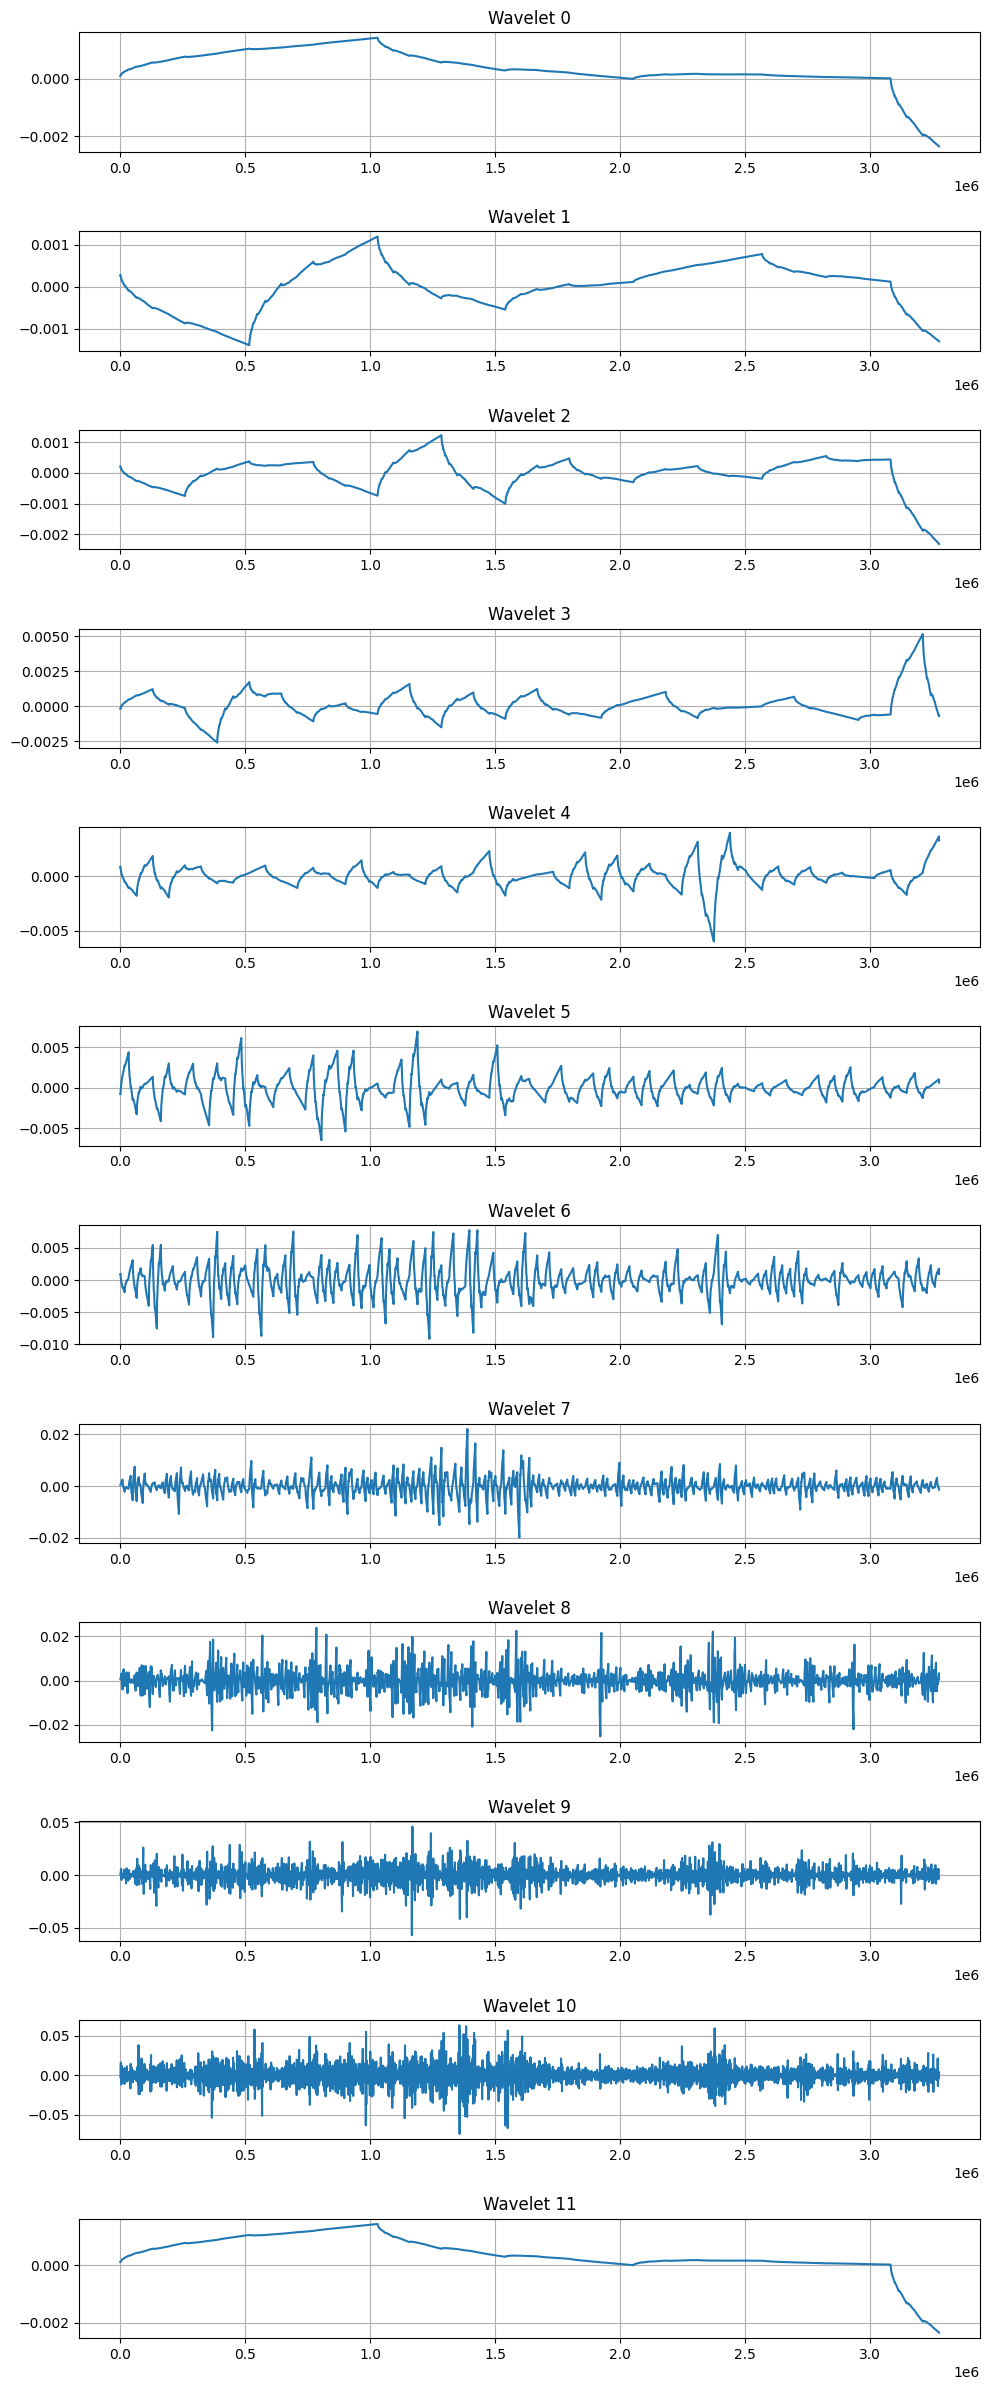

In [18]:


import matplotlib.pyplot as plt

num_wavelets = len([col for col in ibm_wavelets.columns if 'wavelet_' in col])

fig, axes = plt.subplots(num_wavelets, 1, figsize=(10, 2 * num_wavelets))

for i, ax in enumerate(axes):
    ax.plot(ibm_wavelets.index, ibm_wavelets[f'wavelet_{i}'])
    ax.set_title(f'Wavelet {i}')
    ax.grid(True)

plt.tight_layout()
plt.show()

<Axes: >

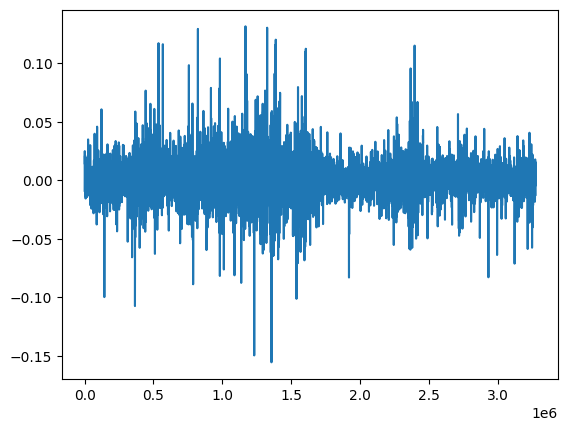

In [19]:
ibm['RET'].plot()